# Introduction
## About Authur
* I am Masod ul Hassan Ghauri. I am a student of Data science & AI subject.
* LnkDn Profile: https://www.linkedin.com/in/masod-ghauri-914a18334/
* Kaggle Profile: https://www.kaggle.com/masodulhassanghauri
* GitHub Profile: https://github.com/Masod6
## About Dataset
I've download the data from kaggle https://www.kaggle.com/datasets/zusmani/pakistan-temperature?select=Tempreture_1901_2016_Pakistan.csv 
Context
Climate change is affecting the world and Pakistan is no difference. This is one of its kind dataset for average temperature in the country for last 116 years.

Content
Data contains temperature in Celsius by month for last 116 years from 1901 to 2016.

Acknowledgements
Data has been scrapped from PMD archives.

Inspiration
See if you can use your data science skills to co-relate this dataset with climate change datasets and raising temperature in nearby geographies.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'F:\Data Sceince\Data Sets\Tempreture_1901_2016_Pakistan.csv')

In [3]:
# Preview the dataset
print(data.head())

   Temperature - (Celsius)   Year     Month
0                  7.72768   1901   January
1                  8.93600   1901  February
2                 16.96320   1901     March
3                 21.27410   1901     April
4                 26.04970   1901       May


In [4]:
data.rename(columns={'Year': 'year'}, inplace=True)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature - (Celsius)  1392 non-null   float64
 1    Year                    1392 non-null   int64  
 2   Month                    1392 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 32.8+ KB
None


In [6]:
# Strip spaces and standardize column names
# If the output shows the column name is not working, clean up the column name
data.columns = data.columns.str.strip().str.lower()

In [7]:
# check missing values
print(data.isnull().sum())

temperature - (celsius)    0
year                       0
month                      0
dtype: int64


In [8]:
data.columns

Index(['temperature - (celsius)', 'year', 'month'], dtype='object')

In [9]:
data['year'] = pd.to_datetime(data['year']).dt.year

In [10]:
# Group by year and find the average temperature
yearly_avg_temp = data.groupby('year')['temperature - (celsius)'].mean()
# Plot the trend
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 5))
monthly_avg_temp.plot(kind='bar', color='orange')
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()


NameError: name 'monthly_avg_temp' is not defined

<Figure size 800x500 with 0 Axes>

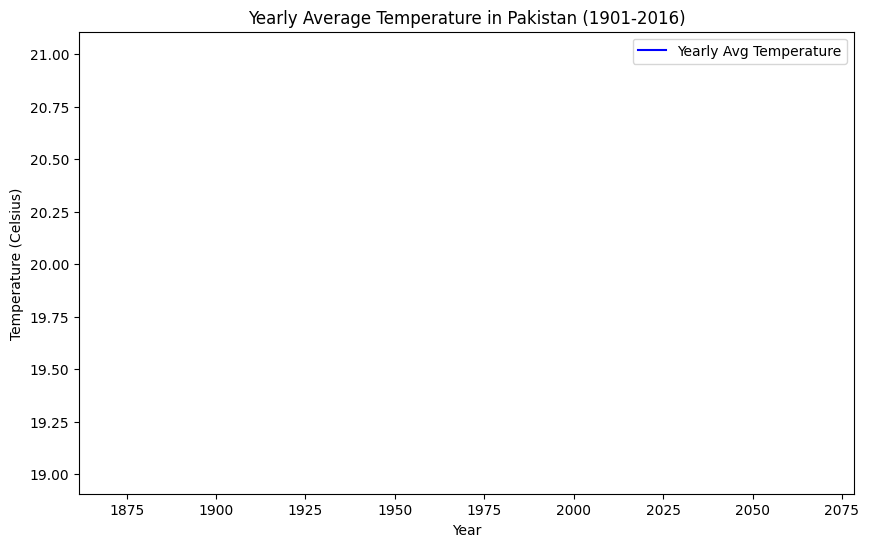

In [46]:
# Group by year and calculate average temperature
yearly_avg_temp = data.groupby('year')['temperature - (celsius)'].mean()

# Plot yearly trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp, label='Yearly Avg Temperature', color='blue')
plt.title('Yearly Average Temperature in Pakistan (1901-2016)')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()


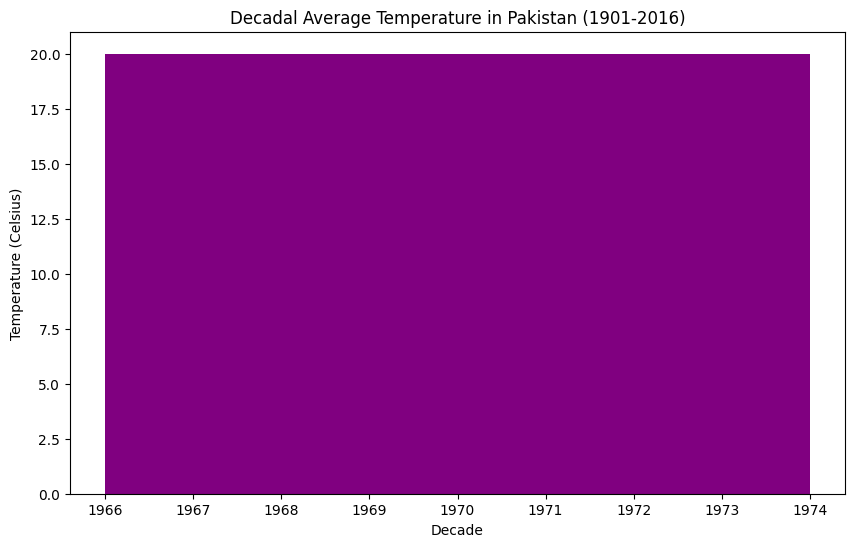

In [47]:
# Create a decade column
data['decade'] = (data['year'] // 10) * 10

# Group by decade and calculate average temperature
decadal_avg_temp = data.groupby('decade')['temperature - (celsius)'].mean()

# Plot decadal trends
plt.figure(figsize=(10, 6))
plt.bar(decadal_avg_temp.index, decadal_avg_temp.values, color='purple', width=8)
plt.title('Decadal Average Temperature in Pakistan (1901-2016)')
plt.xlabel('Decade')
plt.ylabel('Temperature (Celsius)')
plt.show()


In [48]:
# Find the highest and lowest temperatures
max_temp = data['temperature - (celsius)'].max()
min_temp = data['temperature - (celsius)'].min()

max_temp_row = data[data['temperature - (celsius)'] == max_temp]
min_temp_row = data[data['temperature - (celsius)'] == min_temp]

print("Highest Temperature Recorded:")
print(max_temp_row)

print("\nLowest Temperature Recorded:")
print(min_temp_row)


Highest Temperature Recorded:
      temperature - (celsius)  year month  Month  decade
1361                  30.3058  1970  June      1    1970

Lowest Temperature Recorded:
     temperature - (celsius)  year    month  Month  decade
756                  5.91348  1970  January      1    1970


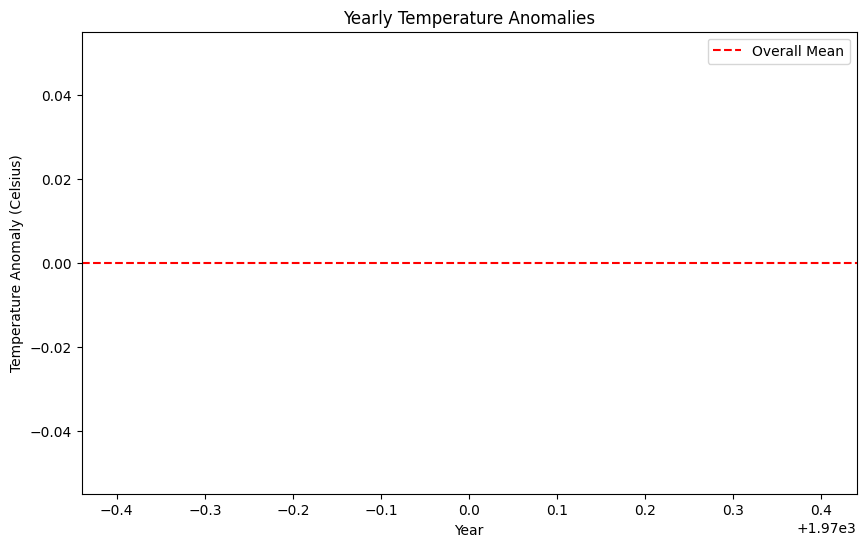

In [11]:
# Calculate overall mean temperature
overall_mean_temp = data['temperature - (celsius)'].mean()

# Calculate yearly anomalies
yearly_avg_temp = data.groupby('year')['temperature - (celsius)'].mean()
yearly_anomalies = yearly_avg_temp - overall_mean_temp

# Plot anomalies
plt.figure(figsize=(10, 6))
plt.bar(yearly_anomalies.index, yearly_anomalies.values, color='gray')
plt.axhline(0, color='red', linestyle='--', label='Overall Mean')
plt.title('Yearly Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (Celsius)')
plt.legend()
plt.show()


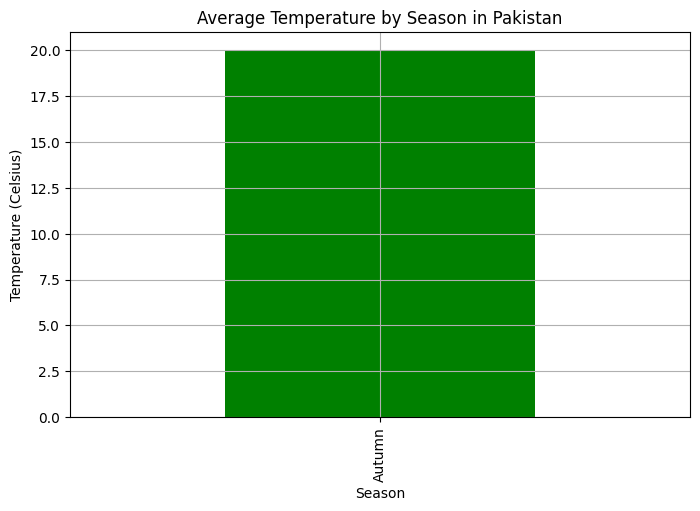

In [13]:
# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['season'] = data['month'].apply(get_season)

# Group by season and calculate average temperature
seasonal_avg_temp = data.groupby('season')['temperature - (celsius)'].mean()

# Plot seasonal trends
seasonal_avg_temp.plot(kind='bar', color='green', figsize=(8, 5))
plt.title('Average Temperature by Season in Pakistan')
plt.xlabel('Season')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()


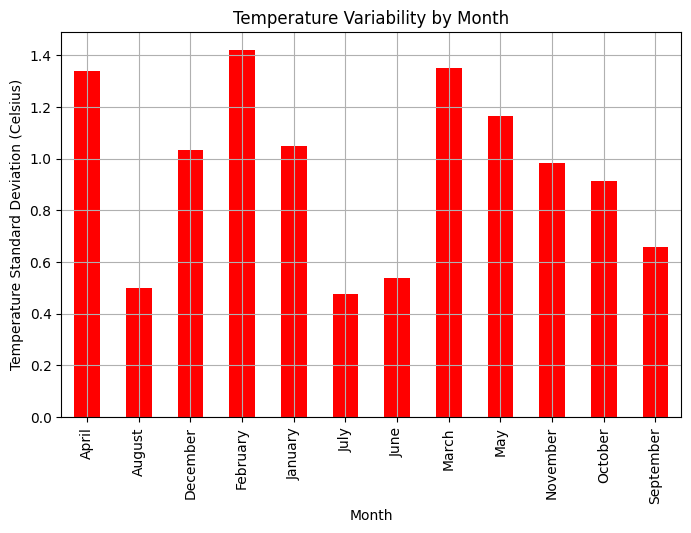

In [14]:
# Group by month and calculate standard deviation
monthly_temp_std = data.groupby('month')['temperature - (celsius)'].std()

# Plot temperature variability
plt.figure(figsize=(8, 5))
monthly_temp_std.plot(kind='bar', color='red')
plt.title('Temperature Variability by Month')
plt.xlabel('Month')
plt.ylabel('Temperature Standard Deviation (Celsius)')
plt.grid()
plt.show()


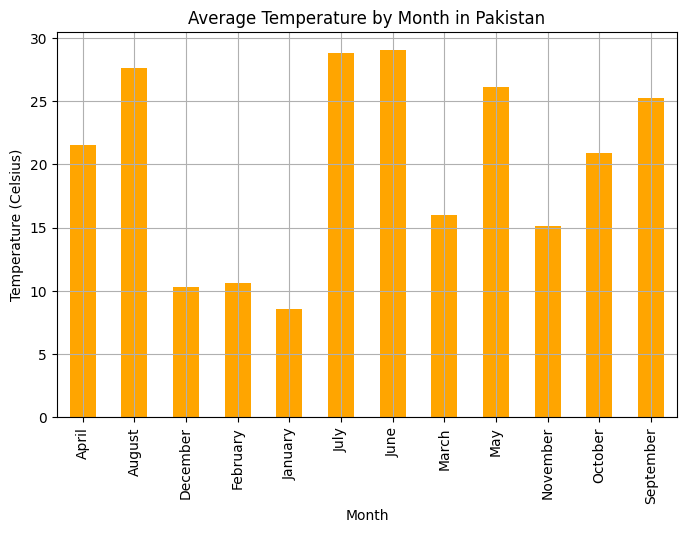

In [15]:
# Group by month and calculate average temperature
monthly_avg_temp = data.groupby('month')['temperature - (celsius)'].mean()

# Plot monthly trends
plt.figure(figsize=(8, 5))
monthly_avg_temp.plot(kind='bar', color='orange')
plt.title('Average Temperature by Month in Pakistan')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.grid()
plt.show()


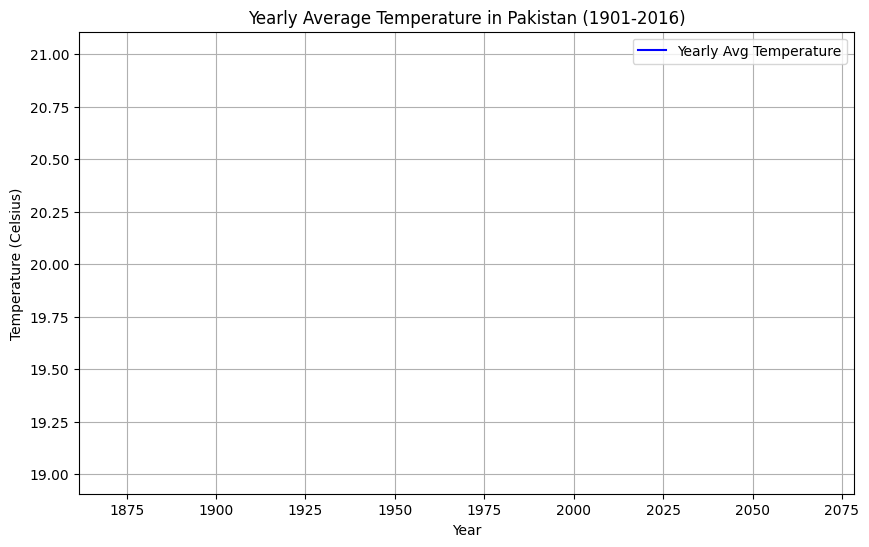

In [16]:
# Group by year and calculate average temperature
yearly_avg_temp = data.groupby('year')['temperature - (celsius)'].mean()

# Plot yearly trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp, label='Yearly Avg Temperature', color='blue')
plt.title('Yearly Average Temperature in Pakistan (1901-2016)')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.grid()
plt.show()


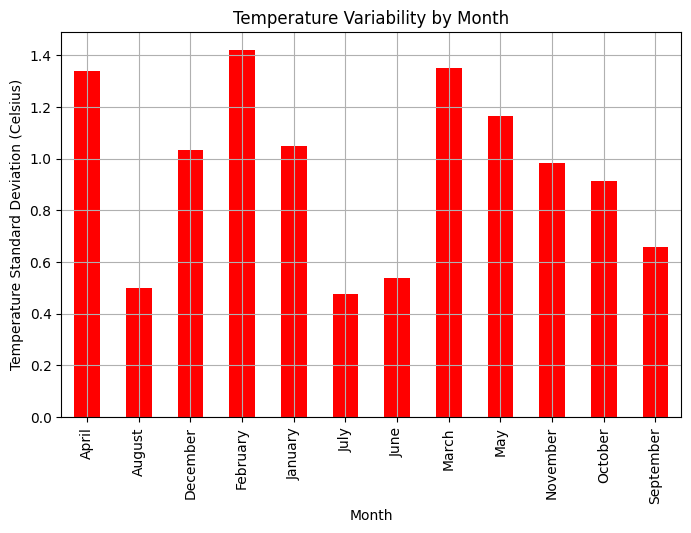

In [17]:
# Group by month and calculate standard deviation
monthly_temp_std = data.groupby('month')['temperature - (celsius)'].std()

# Plot temperature variability
plt.figure(figsize=(8, 5))
monthly_temp_std.plot(kind='bar', color='red')
plt.title('Temperature Variability by Month')
plt.xlabel('Month')
plt.ylabel('Temperature Standard Deviation (Celsius)')
plt.grid()
plt.show()


In [18]:
# Find the highest and lowest temperatures
max_temp = data['temperature - (celsius)'].max()
min_temp = data['temperature - (celsius)'].min()

max_temp_row = data[data['temperature - (celsius)'] == max_temp]
min_temp_row = data[data['temperature - (celsius)'] == min_temp]

print("Highest Temperature Recorded:\n", max_temp_row)
print("\nLowest Temperature Recorded:\n", min_temp_row)


Highest Temperature Recorded:
       temperature - (celsius)  year month  season
1361                  30.3058  1970  June  Autumn

Lowest Temperature Recorded:
      temperature - (celsius)  year    month  season
756                  5.91348  1970  January  Autumn
